#

In [3017]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3018]:
data_path_p = "P.csv" # import data

Actual_p = pd.read_csv(data_path_p, names = ["EPC"])
Actual_p['actual'] = 'P'
Actual_p

,EPC,actual
0,0000001000000174503867DE,P
1,0000001000000174503905F3,P
2,00000010000001745038862E,P
3,0000001000000174503892A9,P
4,0000001000000174503917D2,P
...,...,...
95,0000001000000174503904C2,P
96,000000100000017450385835,P
97,000000100000017451876265,P
98,00000010000001745039469D,P


In [3019]:
data_path_n = "N.csv" # import data

Actual_n = pd.read_csv(data_path_n, names = ["EPC"])
Actual_n['actual'] = 'N'
Actual_n

,EPC,actual
0,00000010000001745040118C,N
1,0000001000000174504027EF,N
2,00000010000001745039618C,N
3,000000100000017450396548,N
4,000000100000017450402149,N
...,...,...
95,000000100000017450400847,N
96,0000001000000174503988C5,N
97,0000001000000174503989F4,N
98,000000100000017450392575,N


# Actuals

In [3020]:
Actuals = pd.concat([Actual_p, Actual_n], axis=0).reset_index(drop=True)
Actuals

,EPC,actual
0,0000001000000174503867DE,P
1,0000001000000174503905F3,P
2,00000010000001745038862E,P
3,0000001000000174503892A9,P
4,0000001000000174503917D2,P
...,...,...
195,000000100000017450400847,N
196,0000001000000174503988C5,N
197,0000001000000174503989F4,N
198,000000100000017450392575,N


In [3021]:
Actuals.groupby('actual').count()

,EPC
actual,
N,100
P,100


In [3022]:
Actuals.groupby('actual').size()

actual
N    100
P    100
dtype: int64

# Tags

In [3023]:
tags = pd.read_csv("ismin_13dec2024_14h.csv", skiprows=3, sep=';', decimal=",", names = ["Timestamp", "EPC", "TID", "Antenna", "RSSI", "Frequency", "Hostname", "PhaseAngle", "DopplerFrequency"])
tags.head()

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency
0,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
1,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
2,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
3,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
4,2024-12-13T13:58:18.7757780+01:00,0000001000000174504052E2,NaN,1,-76.5,865.7,169.254.1.1,NaN,NaN


In [3024]:
tags = tags[["Timestamp", "EPC", "Antenna", "RSSI"]]
tags

,Timestamp,EPC,Antenna,RSSI
0,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
1,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
2,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
3,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
4,2024-12-13T13:58:18.7757780+01:00,0000001000000174504052E2,1,-76.5
...,...,...,...,...
3659,2024-12-13T13:58:26.2122420+01:00,0000001000000174504000FE,3,-71.0
3660,2024-12-13T13:58:26.2442340+01:00,000000100000017450397658,4,-67.5
3661,2024-12-13T13:58:26.2442340+01:00,000000100000017450397658,4,-67.5
3662,2024-12-13T13:58:26.2442340+01:00,000000100000017450397658,4,-67.5


In [3025]:
tags = tags.drop_duplicates().reset_index(drop=True)
tags.dtypes

Timestamp     object
EPC           object
Antenna        int64
RSSI         float64
dtype: object

In [3026]:
tags["Timestamp"] = pd.to_datetime(tags['Timestamp'])
tags.dtypes

Timestamp    datetime64[ns, UTC+01:00]
EPC                             object
Antenna                          int64
RSSI                           float64
dtype: object

In [3027]:
# Durée du tir
duree = tags["Timestamp"].max() - tags["Timestamp"].min()
duree.total_seconds()

7.47236

In [3028]:
tags.shape

(916, 4)

In [3029]:
tags["EPC"].nunique()

193

In [3030]:
tags.head()

,Timestamp,EPC,Antenna,RSSI
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0
1,2024-12-13 13:58:18.775778+01:00,0000001000000174504052E2,1,-76.5
2,2024-12-13 13:58:18.781405+01:00,0000001000000174504001CF,1,-79.0
3,2024-12-13 13:58:18.817221+01:00,0C0000000000000000000000,2,-66.0
4,2024-12-13 13:58:18.820954+01:00,00007DC3160F270713F20859,2,-59.5


In [3031]:
Actuals.head()

,EPC,actual
0,0000001000000174503867DE,P
1,0000001000000174503905F3,P
2,00000010000001745038862E,P
3,0000001000000174503892A9,P
4,0000001000000174503917D2,P


In [3032]:
tags = tags.merge(Actuals, on="EPC", how="inner")
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N


In [3033]:
tags["actual"].unique()

array(['N', 'P'], dtype=object)

In [3034]:
tags.groupby('actual').size()
tags.shape

(902, 5)

In [3035]:
tags[tags["Timestamp"].isna()]

,Timestamp,EPC,Antenna,RSSI,actual


In [3036]:
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N


In [3037]:
tags.groupby('actual').nunique()

,Timestamp,EPC,Antenna,RSSI
actual,,,,
N,391,91,4,40
P,511,100,4,53


In [3038]:
tags.groupby('actual')["EPC"].nunique()

actual
N     91
P    100
Name: EPC, dtype: int64

In [3039]:
for key, tags_key in tags.groupby('actual'):
    print(key)
    print(tags_key)

N
                           Timestamp                       EPC  Antenna  RSSI   
0   2024-12-13 13:58:18.771874+01:00  000000100000017450404665        1 -76.0  \
1   2024-12-13 13:58:20.047636+01:00  000000100000017450404665        3 -74.5   
2   2024-12-13 13:58:21.309841+01:00  000000100000017450404665        3 -77.0   
3   2024-12-13 13:58:22.711631+01:00  000000100000017450404665        3 -70.5   
4   2024-12-13 13:58:24.021113+01:00  000000100000017450404665        1 -76.0   
..                               ...                       ...      ...   ...   
897 2024-12-13 13:58:24.290915+01:00  000000100000017450401479        4 -79.5   
898 2024-12-13 13:58:23.761544+01:00  0000001000000174504026DE        3 -77.0   
899 2024-12-13 13:58:23.774646+01:00  000000100000017450394368        3 -76.5   
900 2024-12-13 13:58:24.043776+01:00  0000001000000174503959F0        1 -79.0   
901 2024-12-13 13:58:25.630877+01:00  0000001000000174503959F0        3 -77.5   

    actual  
0        N  

In [3040]:
tags["EPC"].nunique()

191

In [3041]:
# Nombre de détection par tag
numberOfDetection = tags.groupby('EPC').size()
numberOfDetection.min(), numberOfDetection.max(), numberOfDetection.mean(), numberOfDetection.median()

(1, 6, 4.722513089005235, 5.0)

In [3042]:
tags.groupby('EPC').size().describe()

count    191.000000
mean       4.722513
std        1.188305
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        6.000000
dtype: float64

<Axes: xlabel='Timestamp', ylabel='RSSI'>

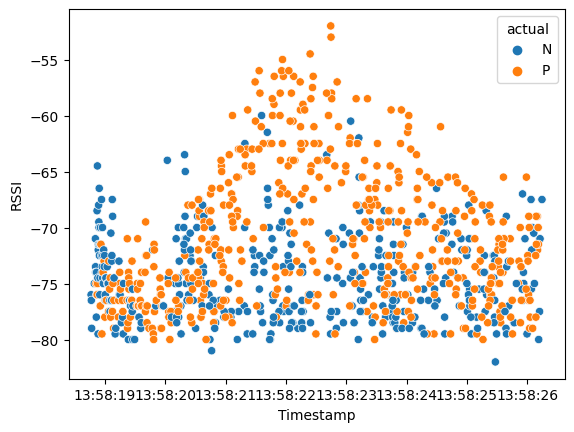

In [3043]:
# Graphe RSSI en fonction du temps
sns.scatterplot(x="Timestamp", y="RSSI", data=tags, hue="actual")

In [3044]:
tags["Antenna coverage"] = tags["Antenna"].apply(lambda x: "In" if x in [3, 4] else "Out")
tags

,Timestamp,EPC,Antenna,RSSI,actual,Antenna coverage
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N,Out
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N,In
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N,In
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N,In
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N,Out
...,...,...,...,...,...,...
897,2024-12-13 13:58:24.290915+01:00,000000100000017450401479,4,-79.5,N,In
898,2024-12-13 13:58:23.761544+01:00,0000001000000174504026DE,3,-77.0,N,In
899,2024-12-13 13:58:23.774646+01:00,000000100000017450394368,3,-76.5,N,In
900,2024-12-13 13:58:24.043776+01:00,0000001000000174503959F0,1,-79.0,N,Out


<Axes: xlabel='Timestamp', ylabel='RSSI'>

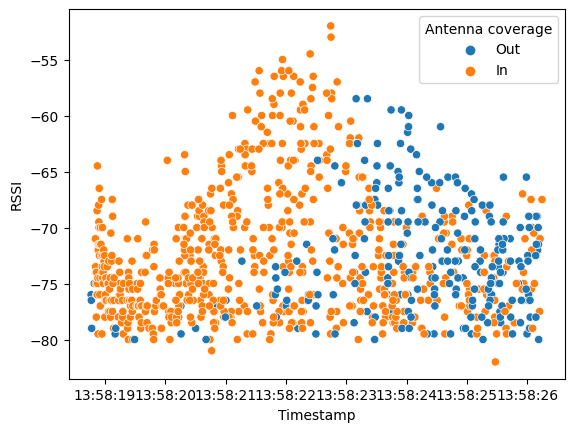

In [3045]:
sns.scatterplot(x="Timestamp", y="RSSI", data=tags, hue="Antenna coverage")

In [3046]:
tags.groupby(["actual", "Antenna coverage"])

for (actual, antenna_coverage), tags_key in tags.groupby(["actual", "Antenna coverage"]):
    print(actual, antenna_coverage)
    print(tags_key)

N In
                           Timestamp                       EPC  Antenna  RSSI   
1   2024-12-13 13:58:20.047636+01:00  000000100000017450404665        3 -74.5  \
2   2024-12-13 13:58:21.309841+01:00  000000100000017450404665        3 -77.0   
3   2024-12-13 13:58:22.711631+01:00  000000100000017450404665        3 -70.5   
5   2024-12-13 13:58:25.327385+01:00  000000100000017450404665        4 -76.0   
7   2024-12-13 13:58:20.035258+01:00  0000001000000174504052E2        3 -64.0   
..                               ...                       ...      ...   ...   
896 2024-12-13 13:58:22.276104+01:00  000000100000017450401479        3 -79.0   
897 2024-12-13 13:58:24.290915+01:00  000000100000017450401479        4 -79.5   
898 2024-12-13 13:58:23.761544+01:00  0000001000000174504026DE        3 -77.0   
899 2024-12-13 13:58:23.774646+01:00  000000100000017450394368        3 -76.5   
901 2024-12-13 13:58:25.630877+01:00  0000001000000174503959F0        3 -77.5   

    actual Antenna cov

In [3047]:
marker_dict = {"P": "o", "N": "+"}
color_dict = {"In": "blue", "Out": "red"}

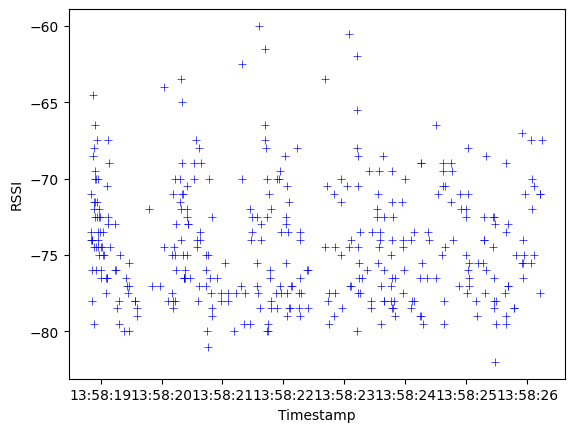

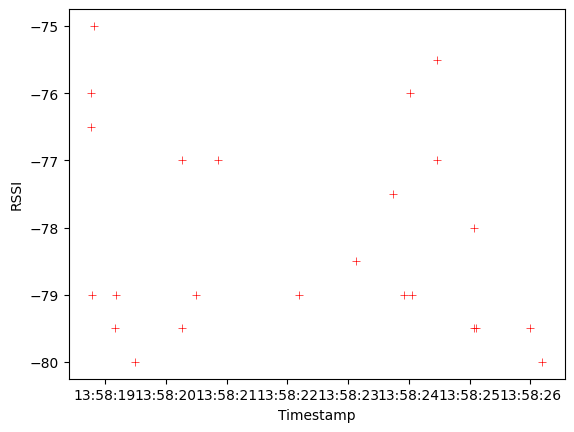

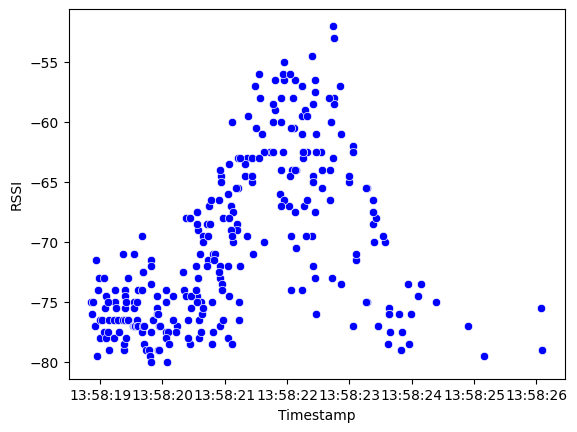

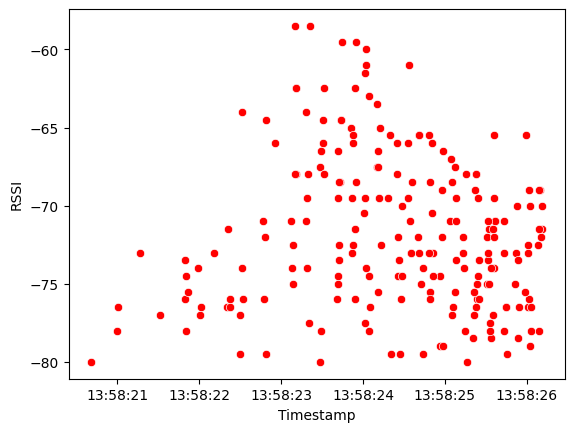

In [3048]:
tags.groupby(["actual", "Antenna coverage"])

for (actual, antenna_coverage), tags_key in tags.groupby(["actual", "Antenna coverage"]):
    c = color_dict[antenna_coverage]
    m = marker_dict[actual]

    sns.scatterplot(x="Timestamp", y="RSSI", data=tags_key, color=c, marker=m)
    plt.show()

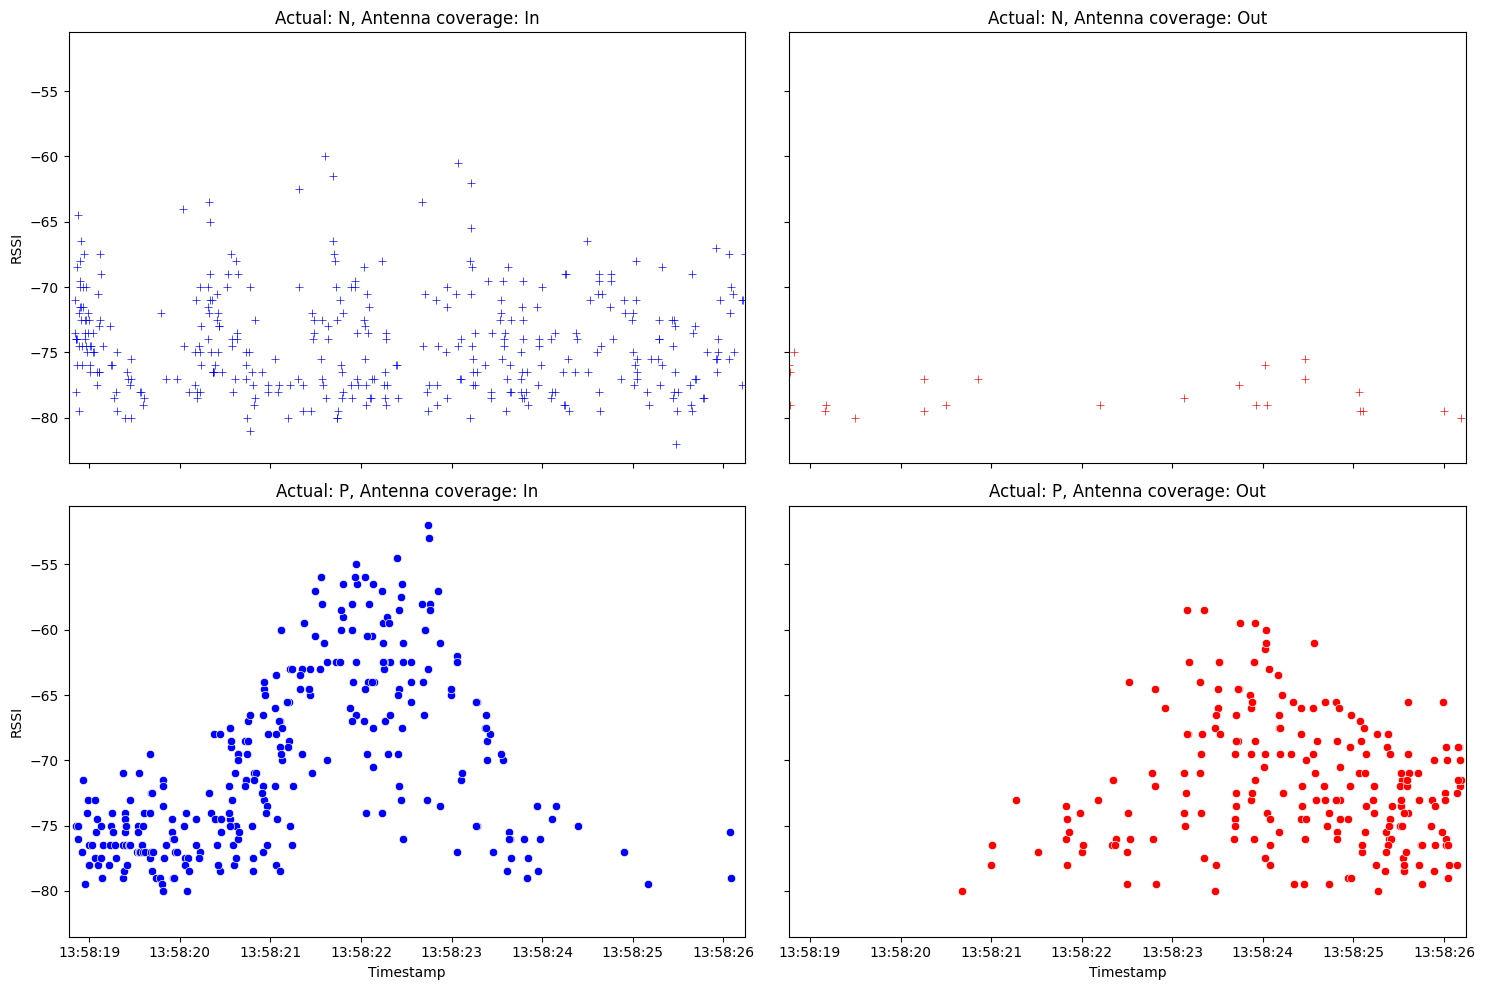

In [3049]:
# Définir le nombre de lignes et de colonnes pour la grille
n_rows = 2
n_cols = 2

# Créer une figure et une grille de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True, sharey=True)

# Aplatir les axes pour un accès plus facile
axes = axes.flatten()

# Définir les limites de l'axe x
tmin = tags["Timestamp"].min()
tmax = tags["Timestamp"].max()

# Parcourir les groupes et tracer les graphiques
for i, ((actual, antenna_coverage), tags_key) in enumerate(tags.groupby(["actual", "Antenna coverage"])):
    c = color_dict[antenna_coverage]
    m = marker_dict[actual]

    ax = axes[i]
    ax.set_xlim(tmin, tmax)
    sns.scatterplot(x="Timestamp", y="RSSI", data=tags_key, color=c, marker=m, ax=ax)
    ax.set_title(f'Actual: {actual}, Antenna coverage: {antenna_coverage}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [3050]:
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual,Antenna coverage
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N,Out
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N,In
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N,In
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N,In
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N,Out


In [3051]:
tags.sort_values(by="EPC")

,Timestamp,EPC,Antenna,RSSI,actual,Antenna coverage
378,2024-12-13 13:58:19.143833+01:00,000000100000017450384669,4,-79.0,P,In
380,2024-12-13 13:58:21.840960+01:00,000000100000017450384669,1,-78.0,P,Out
379,2024-12-13 13:58:20.552920+01:00,000000100000017450384669,3,-67.5,P,In
381,2024-12-13 13:58:23.167350+01:00,000000100000017450384669,2,-68.0,P,Out
382,2024-12-13 13:58:24.581318+01:00,000000100000017450384669,2,-73.0,P,Out
...,...,...,...,...,...,...
607,2024-12-13 13:58:19.596088+01:00,0000001000000174518764C3,4,-79.0,N,In
47,2024-12-13 13:58:18.858662+01:00,0000001000000174518765F2,3,-78.0,N,In
49,2024-12-13 13:58:22.842510+01:00,0000001000000174518765F2,3,-77.5,N,In
48,2024-12-13 13:58:21.046663+01:00,0000001000000174518765F2,3,-75.5,N,In


In [3052]:
tags.groupby("EPC")["RSSI"].max()

EPC
000000100000017450384669   -67.5
000000100000017450384758   -62.5
000000100000017450384947   -76.5
0000001000000174503853DF   -58.0
000000100000017450385448   -71.5
                            ... 
000000100000017451876265   -64.0
000000100000017451876354   -70.0
0000001000000174518764C3   -77.5
0000001000000174518765F2   -75.5
0000001000000174518766A1   -78.5
Name: RSSI, Length: 191, dtype: float64

# Dataset

In [3053]:
ds = tags.groupby("EPC")["RSSI"].max().rename("RSSI max").reset_index(drop=False)
ds

,EPC,RSSI max
0,000000100000017450384669,-67.5
1,000000100000017450384758,-62.5
2,000000100000017450384947,-76.5
3,0000001000000174503853DF,-58.0
4,000000100000017450385448,-71.5
...,...,...
186,000000100000017451876265,-64.0
187,000000100000017451876354,-70.0
188,0000001000000174518764C3,-77.5
189,0000001000000174518765F2,-75.5


In [3054]:
ds = pd.merge(ds, Actuals, on=["EPC"], how="inner")
ds

,EPC,RSSI max,actual
0,000000100000017450384669,-67.5,P
1,000000100000017450384758,-62.5,P
2,000000100000017450384947,-76.5,N
3,0000001000000174503853DF,-58.0,P
4,000000100000017450385448,-71.5,P
...,...,...,...
186,000000100000017451876265,-64.0,P
187,000000100000017451876354,-70.0,N
188,0000001000000174518764C3,-77.5,N
189,0000001000000174518765F2,-75.5,N


In [3055]:
sns.boxplot

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

In [3056]:
threshold = -68

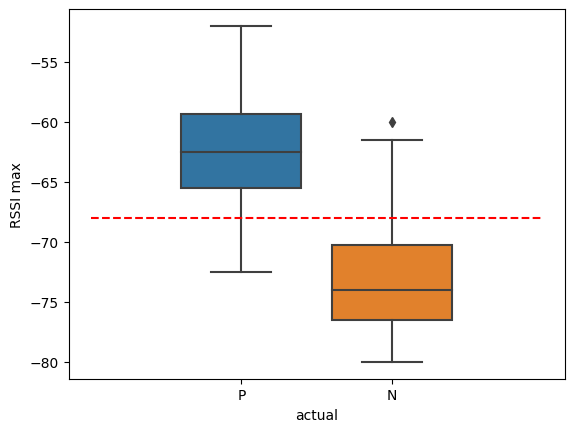

In [3057]:
sns.boxplot(x = "actual",y="RSSI max", data=ds)
plt.hlines(y=threshold, xmin=-1, xmax=2, colors='r', linestyles='dashed')

In [3058]:
crit = ds["RSSI max"] > threshold
crit

0       True
1       True
2      False
3       True
4      False
       ...  
186     True
187    False
188    False
189    False
190    False
Name: RSSI max, Length: 191, dtype: bool

In [3059]:
np.where(crit, "P", "N")

array(['P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P',
       'N', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'N',
       'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P',
       'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N

In [3060]:
ds["pred"] = np.where(crit, "P", "N")
ds

,EPC,RSSI max,actual,pred
0,000000100000017450384669,-67.5,P,P
1,000000100000017450384758,-62.5,P,P
2,000000100000017450384947,-76.5,N,N
3,0000001000000174503853DF,-58.0,P,P
4,000000100000017450385448,-71.5,P,N
...,...,...,...,...
186,000000100000017451876265,-64.0,P,P
187,000000100000017451876354,-70.0,N,N
188,0000001000000174518764C3,-77.5,N,N
189,0000001000000174518765F2,-75.5,N,N


In [3061]:
accuracy = (ds["actual"] == ds["pred"]).mean()
accuracy
print("La précision est de {:.2f}%.".format(accuracy * 100))

La précision est de 87.43%.


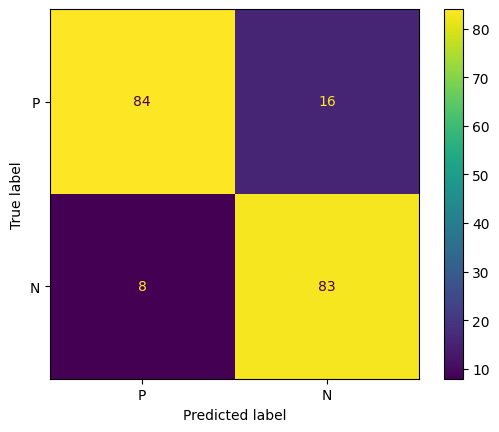

In [3062]:
ConfusionMatrixDisplay.from_predictions(ds["actual"], ds["pred"], labels=ds["actual"].unique())

In [3063]:
print(classification_report(ds["actual"], ds["pred"]))

              precision    recall  f1-score   support

           N       0.84      0.91      0.87        91
           P       0.91      0.84      0.87       100

    accuracy                           0.87       191
   macro avg       0.88      0.88      0.87       191
weighted avg       0.88      0.87      0.87       191



## Decision tree

In [3064]:
clf = DecisionTreeClassifier()
X = ds[["RSSI max"]]
y = ds["actual"]
clf.fit(X, y)
ypred = clf.predict(X)
ds["predDT"] = ypred
ds

,EPC,RSSI max,actual,pred,predDT
0,000000100000017450384669,-67.5,P,P,N
1,000000100000017450384758,-62.5,P,P,P
2,000000100000017450384947,-76.5,N,N,N
3,0000001000000174503853DF,-58.0,P,P,P
4,000000100000017450385448,-71.5,P,N,P
...,...,...,...,...,...
186,000000100000017451876265,-64.0,P,P,P
187,000000100000017451876354,-70.0,N,N,N
188,0000001000000174518764C3,-77.5,N,N,N
189,0000001000000174518765F2,-75.5,N,N,N


In [3065]:
# Précision
accuracy = (ds["actual"] == ds["predDT"]).mean()
accuracy

0.900523560209424

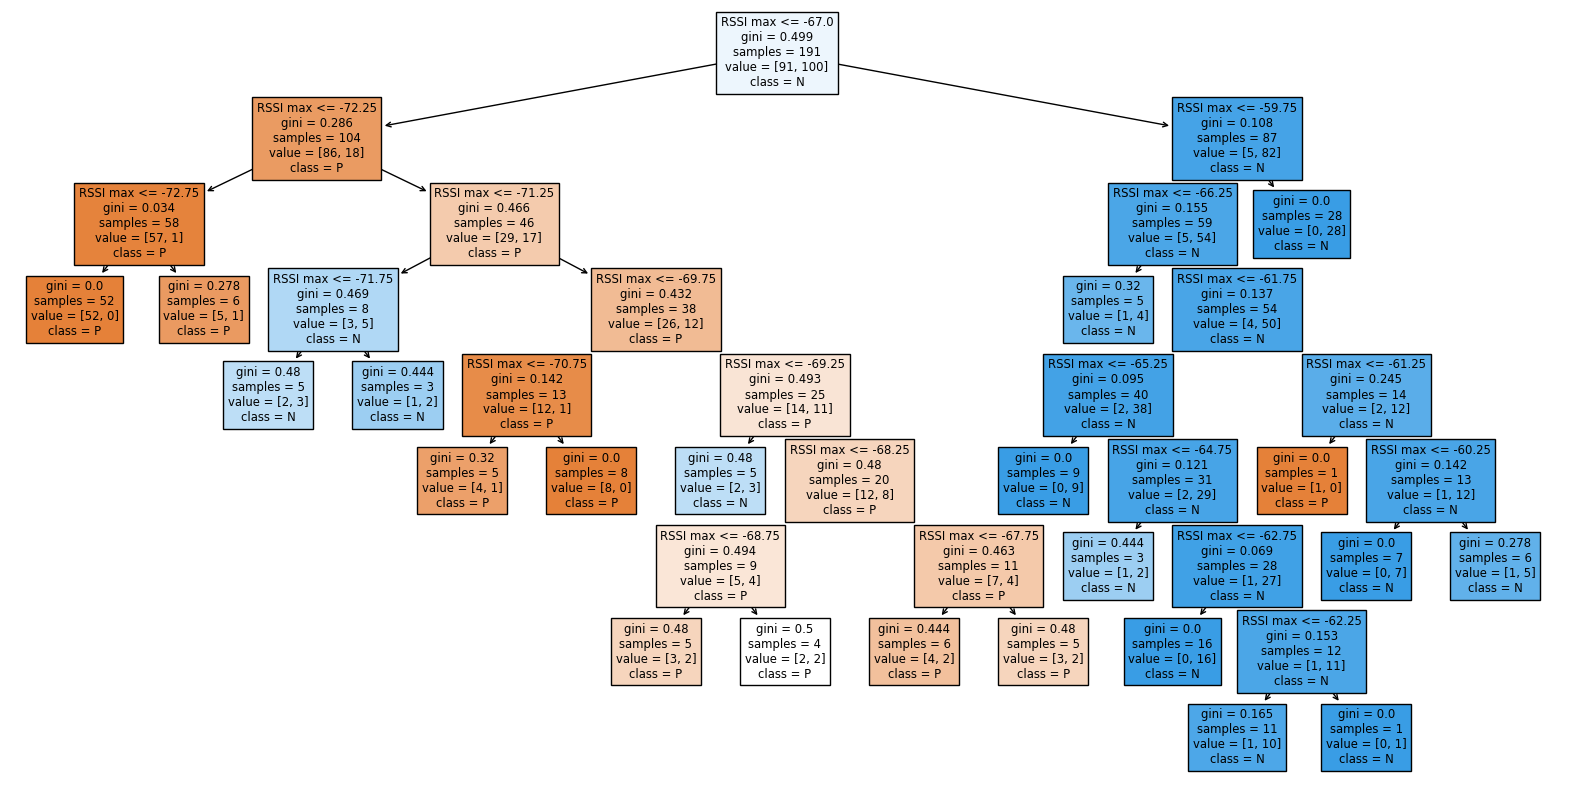

In [3066]:
# Visualiser l'arbre
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=["RSSI max"], class_names=ds["actual"].unique())
plt.show()

In [3067]:
clf.tree_.threshold

array([-67.  , -72.25, -72.75,  -2.  ,  -2.  , -71.25, -71.75,  -2.  ,
        -2.  , -69.75, -70.75,  -2.  ,  -2.  , -69.25,  -2.  , -68.25,
       -68.75,  -2.  ,  -2.  , -67.75,  -2.  ,  -2.  , -59.75, -66.25,
        -2.  , -61.75, -65.25,  -2.  , -64.75,  -2.  , -62.75,  -2.  ,
       -62.25,  -2.  ,  -2.  , -61.25,  -2.  , -60.25,  -2.  ,  -2.  ,
        -2.  ])

#DS: Two Features

In [3068]:
ds = tags.groupby(["EPC", "Antenna coverage"])["RSSI"].max().unstack("Antenna coverage", fill_value=-100).reset_index(drop=False)
ds


Antenna coverage,EPC,In,Out
0,000000100000017450384669,-67.5,-68.0
1,000000100000017450384758,-62.5,-77.0
2,000000100000017450384947,-76.5,-100.0
3,0000001000000174503853DF,-58.0,-60.0
4,000000100000017450385448,-72.0,-71.5
...,...,...,...
186,000000100000017451876265,-64.0,-66.0
187,000000100000017451876354,-70.0,-100.0
188,0000001000000174518764C3,-77.5,-100.0
189,0000001000000174518765F2,-75.5,-100.0


In [3069]:
ds = pd.merge(ds, Actuals, on=["EPC"])
ds

,EPC,In,Out,actual
0,000000100000017450384669,-67.5,-68.0,P
1,000000100000017450384758,-62.5,-77.0,P
2,000000100000017450384947,-76.5,-100.0,N
3,0000001000000174503853DF,-58.0,-60.0,P
4,000000100000017450385448,-72.0,-71.5,P
...,...,...,...,...
186,000000100000017451876265,-64.0,-66.0,P
187,000000100000017451876354,-70.0,-100.0,N
188,0000001000000174518764C3,-77.5,-100.0,N
189,0000001000000174518765F2,-75.5,-100.0,N


<Axes: xlabel='In', ylabel='Out'>

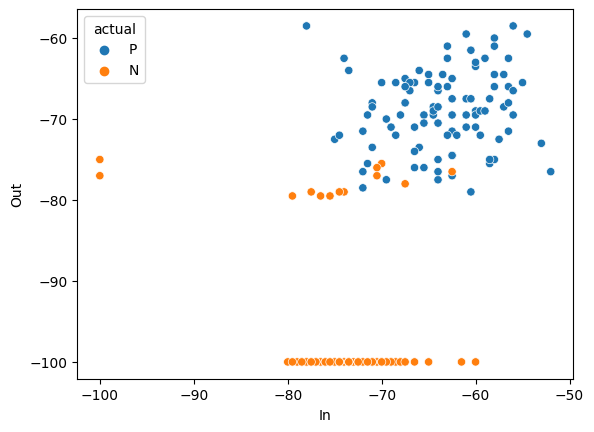

In [3070]:
sns.scatterplot(data = ds, x="In", y="Out", hue="actual")

In [3071]:
#clf = SVC(kernel="linear")
#clf = SVC(kernel="poly")
clf = SVC(kernel="rbf")
X = ds[["In", "Out"]]
y = ds["actual"]
clf.fit(X, y)
ds["pred2D"]=clf.predict(X)
ds

,EPC,In,Out,actual,pred2D
0,000000100000017450384669,-67.5,-68.0,P,P
1,000000100000017450384758,-62.5,-77.0,P,P
2,000000100000017450384947,-76.5,-100.0,N,N
3,0000001000000174503853DF,-58.0,-60.0,P,P
4,000000100000017450385448,-72.0,-71.5,P,P
...,...,...,...,...,...
186,000000100000017451876265,-64.0,-66.0,P,P
187,000000100000017451876354,-70.0,-100.0,N,N
188,0000001000000174518764C3,-77.5,-100.0,N,N
189,0000001000000174518765F2,-75.5,-100.0,N,N


In [3072]:
accuracy = ds["actual"] == ds["pred2D"]
accuracy.mean()

0.9633507853403142

<Axes: xlabel='In', ylabel='Out'>

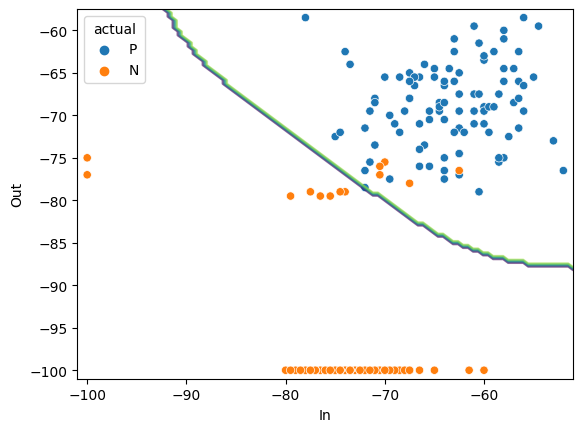

In [3073]:
DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", plot_method="contour",alpha=0.5)
sns.scatterplot(data = ds, x="In", y="Out", hue="actual")

## DS: Many Features

In [3074]:
ds = pd.pivot_table(tags, index="EPC", columns="Antenna coverage", values="RSSI", aggfunc=["max", "mean", "min", "std", len], fill_value=-100)
ds


max              mean           min          
Antenna coverage            In    Out         In     Out    In    Out   
EPC                                                                     
000000100000017450384669 -67.5  -68.0 -73.250000  -72.00 -79.0  -78.0  \
000000100000017450384758 -62.5  -77.0 -72.000000  -77.00 -79.0  -77.0   
000000100000017450384947 -76.5 -100.0 -76.500000 -100.00 -76.5 -100.0   
0000001000000174503853DF -58.0  -60.0 -69.375000  -60.00 -77.5  -60.0   
000000100000017450385448 -72.0  -71.5 -75.333333  -73.00 -79.0  -74.5   
...                        ...    ...        ...     ...   ...    ...   
000000100000017451876265 -64.0  -66.0 -71.250000  -72.25 -76.5  -78.5   
000000100000017451876354 -70.0 -100.0 -72.600000 -100.00 -74.5 -100.0   
0000001000000174518764C3 -77.5 -100.0 -78.625000 -100.00 -79.0 -100.0   
0000001000000174518765F2 -75.5 -100.0 -77.000000 -100.00 -78.0 -100.0   
0000001000000174518766A1 -78.5 -100.0 -78.500000 -100.00 -78.5 -100.0   

                               std             len       
Antenna coverage                In         Out  In  Out  
EPC                                                      
000000100000017450384669  8.131728    4.546061   2    4  
000000100000017450384758  7.129750 -100.000000   4    1  
000000100000017450384947       NaN         NaN   1 -100  
0000001000000174503853DF  9.750000 -100.000000   4    1  
000000100000017450385448  3.511885    2.121320   3    2  
...                            ...         ...  ..  ...  
000000100000017451876265  5.693564    8.838835   4    2  
000000100000017451876354  1.781853 -100.000000   5 -100  
0000001000000174518764C3  0.750000 -100.000000   4 -100  
0000001000000174518765F2  1.322876 -100.000000   3 -100  
0000001000000174518766A1       NaN         NaN   1 -100  

[191 rows x 10 columns]

In [3075]:
ds.columns

MultiIndex([( 'max',  'In'),
            ( 'max', 'Out'),
            ('mean',  'In'),
            ('mean', 'Out'),
            ( 'min',  'In'),
            ( 'min', 'Out'),
            ( 'std',  'In'),
            ( 'std', 'Out'),
            ( 'len',  'In'),
            ( 'len', 'Out')],
           names=[None, 'Antenna coverage'])

In [3076]:
ds.columns = ['_'.join(x) for x in ds.columns]
ds.head()

,max_In,max_Out,mean_In,mean_Out,min_In,min_Out,std_In,std_Out,len_In,len_Out
EPC,,,,,,,,,,
000000100000017450384669,-67.5,-68.0,-73.250000,-72.0,-79.0,-78.0,8.131728,4.546061,2,4
000000100000017450384758,-62.5,-77.0,-72.000000,-77.0,-79.0,-77.0,7.129750,-100.000000,4,1
000000100000017450384947,-76.5,-100.0,-76.500000,-100.0,-76.5,-100.0,NaN,NaN,1,-100
0000001000000174503853DF,-58.0,-60.0,-69.375000,-60.0,-77.5,-60.0,9.750000,-100.000000,4,1
000000100000017450385448,-72.0,-71.5,-75.333333,-73.0,-79.0,-74.5,3.511885,2.121320,3,2


# Nouvelles données

In [3077]:
tags = pd.read_csv("siteismin__clearance2m_2025-01-17_14-30-43.csv", skiprows=3, sep=";", decimal=",", names=["Timestamp", "EPC", "TID", "Antenna", "RSSI", "Frequency", "Hostname", "PhaseAngle", "DopplerFrequency"])
tags.head(20)

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency
0,#2025-01-17T14:30:47.7802776+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#2025-01-17T14:30:47.8370646+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-17T14:30:48.3902720+01:00,0000001000000174503890CB,NaN,1.0,-72.0,865.7,169.254.1.1,NaN,NaN
3,2025-01-17T14:30:48.3944400+01:00,00000010000001745038966D,NaN,1.0,-70.0,865.7,169.254.1.1,NaN,NaN
4,2025-01-17T14:30:48.3975140+01:00,000000100000017450394882,NaN,1.0,-72.0,865.7,169.254.1.1,NaN,NaN
5,2025-01-17T14:30:48.4014490+01:00,00000010000001745038975C,NaN,1.0,-74.0,865.7,169.254.1.1,NaN,NaN
6,2025-01-17T14:30:48.4046540+01:00,000000100000017450393665,NaN,1.0,-76.5,865.7,169.254.1.1,NaN,NaN
7,2025-01-17T14:30:48.4084200+01:00,000000100000017450385448,NaN,1.0,-76.5,865.7,169.254.1.1,NaN,NaN
8,2025-01-17T14:30:48.4121520+01:00,000000100000017450392908,NaN,1.0,-72.0,865.7,169.254.1.1,NaN,NaN
9,2025-01-17T14:30:48.4152460+01:00,0000001000000174503881B9,NaN,1.0,-75.5,865.7,169.254.1.1,NaN,NaN


In [3078]:
tags["Timestamp"].loc[0]

'#2025-01-17T14:30:47.7802776+01:00 GPI Event Port: 1 went: low at 2025-01-17T14:30:47.7781718+01:00'

In [3079]:
cond = tags.EPC.isnull()
photo_eye = tags[cond]
photo_eye

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency
0,#2025-01-17T14:30:47.7802776+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#2025-01-17T14:30:47.8370646+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,#2025-01-17T14:30:56.7181109+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,#2025-01-17T14:30:56.9760546+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,#2025-01-17T14:31:11.4549545+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,#2025-01-17T14:31:11.7543108+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,#2025-01-17T14:31:23.2534422+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,#2025-01-17T14:31:23.5130147+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2215,#2025-01-17T14:31:23.5928743+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236,#2025-01-17T14:31:23.8522252+01:00 GPI Event P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3080]:
cond = tags.Timestamp.apply(lambda x: x.startswith("#"))
photo_eye = tags[cond].Timestamp
photo_eye

0       #2025-01-17T14:30:47.7802776+01:00 GPI Event P...
1       #2025-01-17T14:30:47.8370646+01:00 GPI Event P...
505     #2025-01-17T14:30:56.7181109+01:00 GPI Event P...
518     #2025-01-17T14:30:56.9760546+01:00 GPI Event P...
1448    #2025-01-17T14:31:11.4549545+01:00 GPI Event P...
1468    #2025-01-17T14:31:11.7543108+01:00 GPI Event P...
2190    #2025-01-17T14:31:23.2534422+01:00 GPI Event P...
2209    #2025-01-17T14:31:23.5130147+01:00 GPI Event P...
2215    #2025-01-17T14:31:23.5928743+01:00 GPI Event P...
2236    #2025-01-17T14:31:23.8522252+01:00 GPI Event P...
2239    #2025-01-17T14:31:23.8928311+01:00 GPI Event P...
2241    #2025-01-17T14:31:23.9540661+01:00 GPI Event P...
2951    #2025-01-17T14:31:34.7914899+01:00 GPI Event P...
2971    #2025-01-17T14:31:35.0313493+01:00 GPI Event P...
Name: Timestamp, dtype: object

In [3081]:
photo_eye = photo_eye.apply(lambda x: x.lstrip('#').split(' ')[0])

In [3082]:
photo_eye = pd.to_datetime(photo_eye)
photo_eye

0      2025-01-17 14:30:47.780277600+01:00
1      2025-01-17 14:30:47.837064600+01:00
505    2025-01-17 14:30:56.718110900+01:00
518    2025-01-17 14:30:56.976054600+01:00
1448   2025-01-17 14:31:11.454954500+01:00
1468   2025-01-17 14:31:11.754310800+01:00
2190   2025-01-17 14:31:23.253442200+01:00
2209   2025-01-17 14:31:23.513014700+01:00
2215   2025-01-17 14:31:23.592874300+01:00
2236   2025-01-17 14:31:23.852225200+01:00
2239   2025-01-17 14:31:23.892831100+01:00
2241   2025-01-17 14:31:23.954066100+01:00
2951   2025-01-17 14:31:34.791489900+01:00
2971   2025-01-17 14:31:35.031349300+01:00
Name: Timestamp, dtype: datetime64[ns, UTC+01:00]

In [3083]:
# np.cumsum()
photo_eye.shift(1)
crossing_id = ((photo_eye - photo_eye.shift(1)).dt.total_seconds() > 2).cumsum()
crossing_id

0       0
1       0
505     1
518     1
1448    2
1468    2
2190    3
2209    3
2215    3
2236    3
2239    3
2241    3
2951    4
2971    4
Name: Timestamp, dtype: int64

In [3084]:
photo_eye = pd.DataFrame({"Timestamp" : photo_eye, "Crossing_id" : crossing_id})
photo_eye

,Timestamp,Crossing_id
0,2025-01-17 14:30:47.780277600+01:00,0
1,2025-01-17 14:30:47.837064600+01:00,0
505,2025-01-17 14:30:56.718110900+01:00,1
518,2025-01-17 14:30:56.976054600+01:00,1
1448,2025-01-17 14:31:11.454954500+01:00,2
1468,2025-01-17 14:31:11.754310800+01:00,2
2190,2025-01-17 14:31:23.253442200+01:00,3
2209,2025-01-17 14:31:23.513014700+01:00,3
2215,2025-01-17 14:31:23.592874300+01:00,3
2236,2025-01-17 14:31:23.852225200+01:00,3


In [3085]:
photo_eye = photo_eye.groupby("Crossing_id").Timestamp.mean().reset_index(drop=False)

In [3086]:
photo_eye = photo_eye[photo_eye.Crossing_id != 0]
photo_eye

,Crossing_id,Timestamp
1,1,2025-01-17 14:30:56.847082752+01:00
2,2,2025-01-17 14:31:11.604632576+01:00
3,3,2025-01-17 14:31:23.676408832+01:00
4,4,2025-01-17 14:31:34.911419392+01:00


In [3087]:
cond = tags.EPC.isnull()
tags = tags[~cond]
tags

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency
2,2025-01-17T14:30:48.3902720+01:00,0000001000000174503890CB,NaN,1.0,-72.0,865.7,169.254.1.1,NaN,NaN
3,2025-01-17T14:30:48.3944400+01:00,00000010000001745038966D,NaN,1.0,-70.0,865.7,169.254.1.1,NaN,NaN
4,2025-01-17T14:30:48.3975140+01:00,000000100000017450394882,NaN,1.0,-72.0,865.7,169.254.1.1,NaN,NaN
5,2025-01-17T14:30:48.4014490+01:00,00000010000001745038975C,NaN,1.0,-74.0,865.7,169.254.1.1,NaN,NaN
6,2025-01-17T14:30:48.4046540+01:00,000000100000017450393665,NaN,1.0,-76.5,865.7,169.254.1.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3307,2025-01-17T14:31:41.7924670+01:00,000000100000017450392839,NaN,1.0,-77.5,865.7,169.254.1.1,NaN,NaN
3308,2025-01-17T14:31:41.8206380+01:00,00000010000001745038562A,NaN,2.0,-78.0,865.7,169.254.1.1,NaN,NaN
3309,2025-01-17T14:31:41.8462330+01:00,000000100000017450384669,NaN,3.0,-72.5,865.7,169.254.1.1,NaN,NaN
3310,2025-01-17T14:31:41.8599360+01:00,0000001000000174503890CB,NaN,4.0,-80.0,865.7,169.254.1.1,NaN,NaN


In [3088]:
tags = tags[["Timestamp", "EPC", "Antenna", "RSSI"]]
tags

,Timestamp,EPC,Antenna,RSSI
2,2025-01-17T14:30:48.3902720+01:00,0000001000000174503890CB,1.0,-72.0
3,2025-01-17T14:30:48.3944400+01:00,00000010000001745038966D,1.0,-70.0
4,2025-01-17T14:30:48.3975140+01:00,000000100000017450394882,1.0,-72.0
5,2025-01-17T14:30:48.4014490+01:00,00000010000001745038975C,1.0,-74.0
6,2025-01-17T14:30:48.4046540+01:00,000000100000017450393665,1.0,-76.5
...,...,...,...,...
3307,2025-01-17T14:31:41.7924670+01:00,000000100000017450392839,1.0,-77.5
3308,2025-01-17T14:31:41.8206380+01:00,00000010000001745038562A,2.0,-78.0
3309,2025-01-17T14:31:41.8462330+01:00,000000100000017450384669,3.0,-72.5
3310,2025-01-17T14:31:41.8599360+01:00,0000001000000174503890CB,4.0,-80.0


In [3089]:
tags = tags.drop_duplicates().reset_index(drop=True)
tags

,Timestamp,EPC,Antenna,RSSI
0,2025-01-17T14:30:48.3902720+01:00,0000001000000174503890CB,1.0,-72.0
1,2025-01-17T14:30:48.3944400+01:00,00000010000001745038966D,1.0,-70.0
2,2025-01-17T14:30:48.3975140+01:00,000000100000017450394882,1.0,-72.0
3,2025-01-17T14:30:48.4014490+01:00,00000010000001745038975C,1.0,-74.0
4,2025-01-17T14:30:48.4046540+01:00,000000100000017450393665,1.0,-76.5
...,...,...,...,...
3293,2025-01-17T14:31:41.7924670+01:00,000000100000017450392839,1.0,-77.5
3294,2025-01-17T14:31:41.8206380+01:00,00000010000001745038562A,2.0,-78.0
3295,2025-01-17T14:31:41.8462330+01:00,000000100000017450384669,3.0,-72.5
3296,2025-01-17T14:31:41.8599360+01:00,0000001000000174503890CB,4.0,-80.0


In [3090]:
tags["Timestamp"] = pd.to_datetime(tags["Timestamp"])
tags

,Timestamp,EPC,Antenna,RSSI
0,2025-01-17 14:30:48.390272+01:00,0000001000000174503890CB,1.0,-72.0
1,2025-01-17 14:30:48.394440+01:00,00000010000001745038966D,1.0,-70.0
2,2025-01-17 14:30:48.397514+01:00,000000100000017450394882,1.0,-72.0
3,2025-01-17 14:30:48.401449+01:00,00000010000001745038975C,1.0,-74.0
4,2025-01-17 14:30:48.404654+01:00,000000100000017450393665,1.0,-76.5
...,...,...,...,...
3293,2025-01-17 14:31:41.792467+01:00,000000100000017450392839,1.0,-77.5
3294,2025-01-17 14:31:41.820638+01:00,00000010000001745038562A,2.0,-78.0
3295,2025-01-17 14:31:41.846233+01:00,000000100000017450384669,3.0,-72.5
3296,2025-01-17 14:31:41.859936+01:00,0000001000000174503890CB,4.0,-80.0


In [3091]:
tags.dtypes

Timestamp    datetime64[ns, UTC+01:00]
EPC                             object
Antenna                        float64
RSSI                           float64
dtype: object

In [3092]:
# Showing data ("Electronic Product Codes")
Actual_P = pd.read_csv('actualP.csv', names=["EPC"])
Actual_P["actual"] = "P"

Actual_N_out = pd.read_csv('actualN__zoneout.csv', names=["EPC"])
Actual_N_out["actual"] = "N"

Actual_N_out["zone"] = "Out"

Actual_N_in = pd.read_csv('actualN__zonein.csv', names=["EPC"])
Actual_N_in["actual"] = "N"

Actual_N_in["zone"] = "In"

Actuals = pd.concat([Actual_N_in, Actual_N_out, Actual_P], axis=0).reset_index(drop=True)
Actuals

,EPC,actual,zone
0,0000001000000174503869C1,N,In
1,0000001000000174503867DE,N,In
2,000000100000017450391481,N,In
3,0000001000000174503868F0,N,In
4,000000100000017450389872,N,In
...,...,...,...
95,00000010000001745039387A,P,NaN
96,0000001000000174503921B1,P,NaN
97,0000001000000174503949B3,P,NaN
98,000000100000017450395149,P,NaN


In [3093]:
tags = pd.merge(tags, Actuals)
tags

,Timestamp,EPC,Antenna,RSSI,actual,zone
0,2025-01-17 14:30:48.390272+01:00,0000001000000174503890CB,1.0,-72.0,N,Out
1,2025-01-17 14:30:49.690861+01:00,0000001000000174503890CB,1.0,-76.5,N,Out
2,2025-01-17 14:30:51.001187+01:00,0000001000000174503890CB,2.0,-76.0,N,Out
3,2025-01-17 14:30:52.334717+01:00,0000001000000174503890CB,1.0,-75.0,N,Out
4,2025-01-17 14:30:53.640217+01:00,0000001000000174503890CB,3.0,-75.5,N,Out
...,...,...,...,...,...,...
3255,2025-01-17 14:31:35.470022+01:00,000000100000017450389872,3.0,-76.0,N,In
3256,2025-01-17 14:31:36.898862+01:00,000000100000017450389872,1.0,-71.5,N,In
3257,2025-01-17 14:31:38.306215+01:00,000000100000017450389872,3.0,-79.0,N,In
3258,2025-01-17 14:31:39.757845+01:00,000000100000017450389872,1.0,-72.5,N,In


In [3094]:
tags["Antenna coverage"] = tags["Antenna"].apply(lambda x: "In" if x in [1,2] else "Out")
tags

,Timestamp,EPC,Antenna,RSSI,actual,zone,Antenna coverage
0,2025-01-17 14:30:48.390272+01:00,0000001000000174503890CB,1.0,-72.0,N,Out,In
1,2025-01-17 14:30:49.690861+01:00,0000001000000174503890CB,1.0,-76.5,N,Out,In
2,2025-01-17 14:30:51.001187+01:00,0000001000000174503890CB,2.0,-76.0,N,Out,In
3,2025-01-17 14:30:52.334717+01:00,0000001000000174503890CB,1.0,-75.0,N,Out,In
4,2025-01-17 14:30:53.640217+01:00,0000001000000174503890CB,3.0,-75.5,N,Out,Out
...,...,...,...,...,...,...,...
3255,2025-01-17 14:31:35.470022+01:00,000000100000017450389872,3.0,-76.0,N,In,Out
3256,2025-01-17 14:31:36.898862+01:00,000000100000017450389872,1.0,-71.5,N,In,In
3257,2025-01-17 14:31:38.306215+01:00,000000100000017450389872,3.0,-79.0,N,In,Out
3258,2025-01-17 14:31:39.757845+01:00,000000100000017450389872,1.0,-72.5,N,In,In


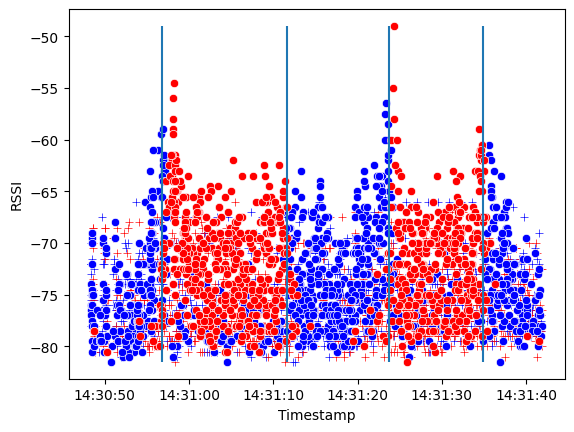

In [3095]:
marker_dict = {"P": "o", "N": "+"}
color_dict = {"In": "blue", "Out": "red"}

RSSI_min = tags.RSSI.min()
RSSI_max = tags.RSSI.max()

for (actual, antenna_coverage), tags_key in tags.groupby(["actual", "Antenna coverage"]):
  c = color_dict[antenna_coverage]
  m = marker_dict[actual]

  sns.scatterplot(x="Timestamp", y="RSSI", data=tags_key, color=c, marker=m)

plt.vlines(x=photo_eye.Timestamp, ymin = RSSI_min, ymax = RSSI_max)

In [3096]:
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual,zone,Antenna coverage
0,2025-01-17 14:30:48.390272+01:00,0000001000000174503890CB,1.0,-72.0,N,Out,In
1,2025-01-17 14:30:49.690861+01:00,0000001000000174503890CB,1.0,-76.5,N,Out,In
2,2025-01-17 14:30:51.001187+01:00,0000001000000174503890CB,2.0,-76.0,N,Out,In
3,2025-01-17 14:30:52.334717+01:00,0000001000000174503890CB,1.0,-75.0,N,Out,In
4,2025-01-17 14:30:53.640217+01:00,0000001000000174503890CB,3.0,-75.5,N,Out,Out


In [3097]:
photo_eye.head()

,Crossing_id,Timestamp
1,1,2025-01-17 14:30:56.847082752+01:00
2,2,2025-01-17 14:31:11.604632576+01:00
3,3,2025-01-17 14:31:23.676408832+01:00
4,4,2025-01-17 14:31:34.911419392+01:00


In [3098]:
tags = tags.sort_values(by="Timestamp")
photo_eye = photo_eye.sort_values(by="Timestamp")

tags = pd.merge_asof(tags, photo_eye, on="Timestamp", direction="nearest")
tags

,Timestamp,EPC,Antenna,RSSI,actual,zone,Antenna coverage,Crossing_id
0,2025-01-17 14:30:48.390272+01:00,0000001000000174503890CB,1.0,-72.0,N,Out,In,1
1,2025-01-17 14:30:48.394440+01:00,00000010000001745038966D,1.0,-70.0,N,In,In,1
2,2025-01-17 14:30:48.397514+01:00,000000100000017450394882,1.0,-72.0,N,In,In,1
3,2025-01-17 14:30:48.401449+01:00,00000010000001745038975C,1.0,-74.0,P,NaN,In,1
4,2025-01-17 14:30:48.404654+01:00,000000100000017450393665,1.0,-76.5,P,NaN,In,1
...,...,...,...,...,...,...,...,...
3255,2025-01-17 14:31:41.792467+01:00,000000100000017450392839,1.0,-77.5,N,In,In,4
3256,2025-01-17 14:31:41.820638+01:00,00000010000001745038562A,2.0,-78.0,P,NaN,In,4
3257,2025-01-17 14:31:41.846233+01:00,000000100000017450384669,3.0,-72.5,N,Out,Out,4
3258,2025-01-17 14:31:41.859936+01:00,0000001000000174503890CB,4.0,-80.0,N,Out,Out,4


In [3099]:
tags["RSSI_dBm"] = tags["RSSI"]

tags["RSSI"] = 10**6*10**(tags["RSSI_dBm"]/10)
tags["RSSI"]

0       0.063096
1       0.100000
2       0.063096
3       0.039811
4       0.022387
          ...   
3255    0.017783
3256    0.015849
3257    0.056234
3258    0.010000
3259    0.022387
Name: RSSI, Length: 3260, dtype: float64

In [3100]:
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual,zone,Antenna coverage,Crossing_id,RSSI_dBm
0,2025-01-17 14:30:48.390272+01:00,0000001000000174503890CB,1.0,0.063096,N,Out,In,1,-72.0
1,2025-01-17 14:30:48.394440+01:00,00000010000001745038966D,1.0,0.100000,N,In,In,1,-70.0
2,2025-01-17 14:30:48.397514+01:00,000000100000017450394882,1.0,0.063096,N,In,In,1,-72.0
3,2025-01-17 14:30:48.401449+01:00,00000010000001745038975C,1.0,0.039811,P,NaN,In,1,-74.0
4,2025-01-17 14:30:48.404654+01:00,000000100000017450393665,1.0,0.022387,P,NaN,In,1,-76.5


In [3101]:
ds = pd.pivot_table(tags, index=["Crossing_id", "EPC"], values="RSSI", aggfunc=["max", "min", len], columns="Antenna coverage", fill_value=0)
x_col = ["_".join(x) for x in ds.columns]

In [3102]:
ds.columns = ["_".join(x) for x in ds.columns]
ds.head()

max_In   max_Out    min_In   min_Out   
Crossing_id EPC                                                                
1           000000100000017450384669  0.000000  0.014125  0.000000  0.011220  \
            000000100000017450384758  0.000000  0.022387  0.000000  0.010000   
            0000001000000174503853DF  0.017783  0.000000  0.017783  0.000000   
            000000100000017450385448  0.022387  0.125893  0.022387  0.050119   
            000000100000017450385579  0.079433  0.199526  0.008913  0.019953   

                                      len_In  len_Out  
Crossing_id EPC                                        
1           000000100000017450384669       0        2  
            000000100000017450384758       0       11  
            0000001000000174503853DF       1        0  
            000000100000017450385448       1       10  
            000000100000017450385579       3        5

In [3103]:
ds = ds.reset_index(drop=False)

In [3104]:
ds.head()

,Crossing_id,EPC,max_In,max_Out,min_In,min_Out,len_In,len_Out
0,1,000000100000017450384669,0.000000,0.014125,0.000000,0.011220,0,2
1,1,000000100000017450384758,0.000000,0.022387,0.000000,0.010000,0,11
2,1,0000001000000174503853DF,0.017783,0.000000,0.017783,0.000000,1,0
3,1,000000100000017450385448,0.022387,0.125893,0.022387,0.050119,1,10
4,1,000000100000017450385579,0.079433,0.199526,0.008913,0.019953,3,5


In [3105]:
ds = pd.merge(ds, Actuals)

In [3106]:
ds

,Crossing_id,EPC,max_In,max_Out,min_In,min_Out,len_In,len_Out,actual,zone
0,1,000000100000017450384669,0.000000,0.014125,0.000000,0.011220,0,2,N,Out
1,2,000000100000017450384669,0.000000,0.100000,0.000000,0.031623,0,8,N,Out
2,3,000000100000017450384669,0.000000,0.100000,0.000000,0.028184,0,7,N,Out
3,4,000000100000017450384669,0.015849,0.089125,0.015849,0.031623,1,9,N,Out
4,1,000000100000017450384758,0.000000,0.022387,0.000000,0.010000,0,11,N,Out
...,...,...,...,...,...,...,...,...,...,...
385,3,000000100000017450389872,0.112202,0.000000,0.014125,0.000000,8,0,N,In
386,4,000000100000017450389872,0.089125,0.025119,0.056234,0.012589,7,2,N,In
387,2,000000100000017450390264,0.000000,0.019953,0.000000,0.007943,0,4,N,Out
388,3,000000100000017450390264,0.000000,0.008913,0.000000,0.007943,0,2,N,Out


In [3107]:
X = ds[x_col]
y = ds["actual"]

clf = RandomForestClassifier()
clf.fit(X, y)

ds["pred_forest"] = clf.predict(X)
ds.head()

,Crossing_id,EPC,max_In,max_Out,min_In,min_Out,len_In,len_Out,actual,zone,pred_forest
0,1,000000100000017450384669,0.000000,0.014125,0.000000,0.011220,0,2,N,Out,N
1,2,000000100000017450384669,0.000000,0.100000,0.000000,0.031623,0,8,N,Out,N
2,3,000000100000017450384669,0.000000,0.100000,0.000000,0.028184,0,7,N,Out,N
3,4,000000100000017450384669,0.015849,0.089125,0.015849,0.031623,1,9,N,Out,N
4,1,000000100000017450384758,0.000000,0.022387,0.000000,0.010000,0,11,N,Out,N


In [3108]:
(ds.actual == ds.pred_forest).mean()

1.0

In [3109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array(['N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'N', 'P', 'N',
       'P', 'P', 'P', 'N', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'P', 'P',
       'P', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'N',
       'P', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'P', 'P',
       'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'N',
       'N', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'N', 'P'],
      dtype=object)

In [3110]:
(y_pred == y_test).mean()

0.9615384615384616

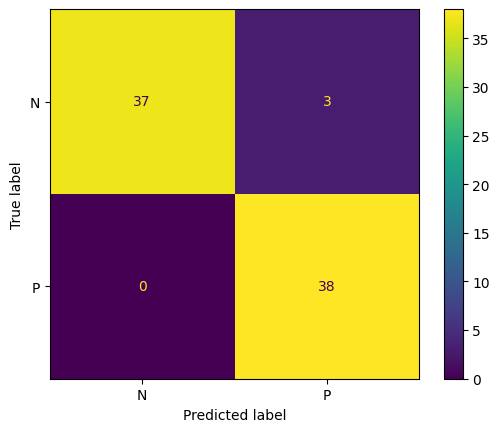

In [3111]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# K-Nearest Neighbors

In [3112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Détermination du meilleur K avec validation croisée
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Meilleur K
best_k = grid_search.best_params_['n_neighbors']
print(f"Le meilleur K avec la validation croisée est : {best_k}")

# Entraînement du modèle KNN avec le meilleur K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Prédictions
y_pred_knn = knn_best.predict(X_test_scaled)

ds["pred_knn"] = knn_best.predict(X)

# Évaluation des performances
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Le meilleur K avec la validation croisée est : 9
Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.88      0.93        40
           P       0.88      1.00      0.94        38

    accuracy                           0.94        78
   macro avg       0.94      0.94      0.94        78
weighted avg       0.94      0.94      0.94        78

Confusion Matrix:
[[35  5]
 [ 0 38]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


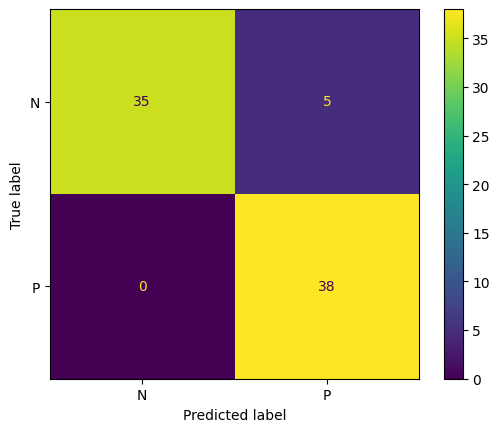

In [3113]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, labels=["N", "P"])

J'ai essayé d'obtenir d'autres résultats avec une classification des K plus proches voisins. On peut remarquer que la valeur de K optimale est 9 mais les résultats restent moi bons qu'avec l'arbre de décision. Le nombre de faux positifs est plus important avec ce nouveau modèle, ce qui peut être probématique pour l'expérience client au sein d'un magasin par exemple.

Nous pouvons également remarquer que les résultats de nos modèles de prédiction dépendent fortement du random state choisi lors de la division du dataset. Cela peut s'expliquer par le fait que le dataset est de taille réduite.

# Gradient Boosting Machines (GMB)

Meilleurs hyperparamètres : {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.7}
Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.93      0.96        40
           P       0.93      1.00      0.96        38

    accuracy                           0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78

Confusion Matrix:


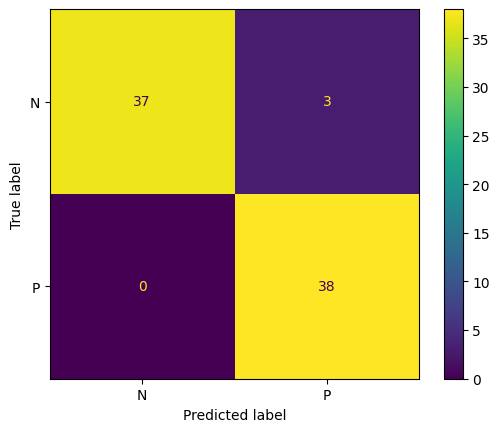

In [3114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [2, 10, 20, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.03],
    'max_depth': list(range(1, 11)),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

# Initialiser le modèle GBM
gbm = GradientBoostingClassifier()

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Entraîner le modèle avec les meilleurs hyperparamètres
best_gbm = grid_search.best_estimator_
best_gbm.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred_gbm = best_gbm.predict(X_test)

# Ajouter les prédictions au DataFrame ds
ds["pred_gbm"] = best_gbm.predict(X)

# Évaluation des performances
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm))

print("Confusion Matrix:")
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm, display_labels=best_gbm.classes_)
disp_gbm.plot()
plt.show()

J'ai tenté d'effectuer une méthode Gradient Boosting Machines (GBM) afin d'améliorer la forêt aléatoire que nous avions. J'ai choisi cette méthode car nous ne l'avons jamais vu en cours, c'était donc intéressant de l'utiliser une première fois.

Les résultats, bien qu'assez bons, sont sensiblement identiques à ceux de la forêt aléatoire. Ils sont néanmoins meilleurs que ceux de l'algorithme KNN. Nous pouvons supposer que le dataset est trop petit pour permettre un apprentissage correct et que nos méthodes ont une légère tendance à l'overfitting. 

J’ai utilisé GridSearchCV afin de choisir les meilleurs hyperparamètres, cela fonctionne en explorant systématiquement toutes les combinaisons possibles des hyperparamètres définis dans une grille, puis en évaluant chaque combinaison à l’aide de la validation croisée. Cette approche permet de trouver les paramètres qui offrent les meilleures performances sur l’ensemble d’entraînement tout en réduisant le risque d'overfitting.